# Report 02- Titanic

* 姓名：石宇洋
* 学号：2019301660

## 任务简介

* 任务类型：二元分类  
&nbsp;
* 任务难点：提供的数据集有部分数据缺失；特征并非全为数字信息，包含文字信息，需对每类特征进行“编码”  
&nbsp;
* 背景介绍：泰坦尼克号的沉没是历史上传播度最广的的沉船事件之一。1912年4月15日，泰坦尼克号在首航时撞上冰山沉没，2224名乘客和船员中1502人遇难。这一耸人听闻的悲剧震惊了国际社会，并导致了相应出台了更好的船舶安全法规。这次海难造成这么多人死亡的原因之一是没有足够的救生艇来载乘客和船员。不过，在这次事件中仍有部分幸存者，虽然他们在沉船中幸存有一些运气因素，但一些群体，如妇女、儿童和上层社会人士，比其他群体更有可能幸存。  
&nbsp;
* 任务介绍：运用机器学习的算法来预测哪些乘客更有可能在悲剧中幸存下来。  
&nbsp;
* 提供数据集介绍：训练集中共有891名乘客的一系列信息，部分乘客的信息缺失；预测集中共有418名乘客的一系列信息，部分乘客信息有缺失。

## 解决思路
* 通过分析题意，我们可以得知这本质就是一个二分类的问题，需要通过模型判断出预测样本集中的乘客是否生还。不过，此题与第一个报告的二分类有所区别，难点就在于训练集以及预测集的样本信息存在缺失，而且特征并非全为数字信息(包含文字信息)，所以这就是我们需要想办法解决的问题。通过在网上查阅学习，我了解到一般的处理方法是丢弃该特征或者补全缺失数据(方法会在后续进行体现)，所以接现在应该梳理解题的思路：  
&nbsp;   
 **1)** 了解提供的数据集，了解其中的每种特征的含义，对数据进行**预处理**；  

 **2)** 将缺失的信息进行补全或者丢弃，构成需要用到的**完整数据集**；
 
 **3)** 用**二分类训练模型**进行训练(方法如同报告1）;
 
 **4)** 测试模型精确度，并进行**预测**。
 
## 开始解决问题

### <big>1.分析数据集，进行预处理</big>
* 通过分析数据集，我们可以得到以下的信息：
|特征|翻译|解释|
|:-:|:-:|:-:|
|PassengerId|乘客ID|乘客的排序|
|Survived|生存|0表示未幸存,1表示幸存|
|Pclass|船票的等级|分为1,2,3等|
|Name|名字|初步判断应该与幸存无关|
|Sex|性别|初步判断应该与幸存有关|
|Age|年龄|初步判断应该与幸存有关|
|SibSp|同船的兄弟姐妹|归属为亲戚|
|Parch|同船的父母孩子|归属为家人|
|Ticket|船票标号|一串字符|
|Fare|船票价格|数字|
|Cabin|船舱号|船舱的位置|
|Embarked|登船港口|分为S,C,Q|

&nbsp;&nbsp;&nbsp;&nbsp;可以发现，数据集提供的特征(个人认为如名字等)有些对结果可能并没有影响，所以为了**提升准度与效率**需要我们去判断哪些特征对幸存有影响。这里我想主要通过对每种特征单独分析，计算每种**特征与幸存的相关系数和协方差**，并且通过可视化的影响来直观观察。

### <big>2.判断特征相关性</big>

### 1)导入第三方库

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 2)读取数据

In [2]:
train_dataset=pd.read_csv('data/train.csv') #导入训练数据集
survived=train_dataset['Survived']
survived_yes=(survived==1).sum() #统计幸存的人数，后续需要使用
#print(survived_yes)
survived_no=(survived==0).sum() #统计未幸存的人数，后续需要使用
# survived=train_dataset.Survived
print(survived)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


### 3)计算每种特征缺失的数据

In [3]:
blank=train_dataset.isna() #找出缺失的数据
# print(blank)
blank=blank.sum() #统计每一类的缺失数据
print(blank)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


可以从上表发现，其中只有Age与Cabin缺少数据(Embarked只缺2个)，特别是Cabin还缺少687个数据，所以后续必须进行处理。
### 4)计算性别与幸存关系(这里将性别进行"编码",male为0,famale为1)

协方差：0.12637612075814325
相关系数：0.5433513806577551


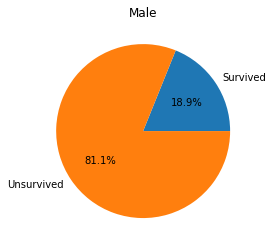

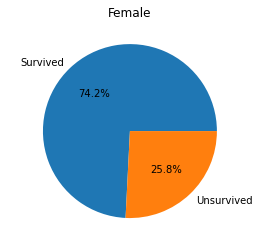

In [4]:
train_dataset.replace('male',int(0),inplace=True) #"编码性别"
train_dataset.replace('female',int(1),inplace=True) #"编码性别"
gender=train_dataset['Sex'] #保存性别组成
print(f'协方差：{gender.cov(survived)}') #计算协方差
print(f'相关系数：{gender.corr(survived)}') #计算相关系数
survived_yes_male=train_dataset[(train_dataset.Sex==0)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
# print(int(survived_yes_male))
survived_no_male=train_dataset[(train_dataset.Sex==0)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_female=train_dataset[(train_dataset.Sex==1)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_female=train_dataset[(train_dataset.Sex==1)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
# 绘图
plt.figure(1)
data1=pd.Series({'Survived':int(survived_yes_male),'Unsurvived':int(survived_no_male)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data1.name='      ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data1.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Male', #为饼图添加标题
          )
plt.show()
plt.figure(2)
data2=pd.Series({'Survived':int(survived_yes_female),'Unsurvived':int(survived_no_female)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data2.name='      ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data2.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Female', #为饼图添加标题
          )
plt.show()


可以从可视化的分类数据，以及相关系数看出“性别”与“幸存”有关系，故此特征保留。
### (5)计算船票等级与幸存关系

协方差：-0.1377028714107366
相关系数：-0.3384810359610153


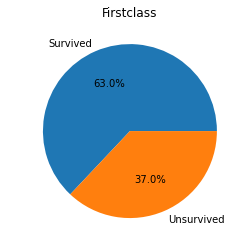

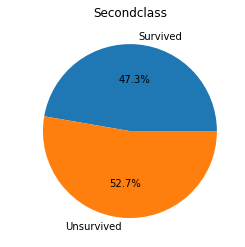

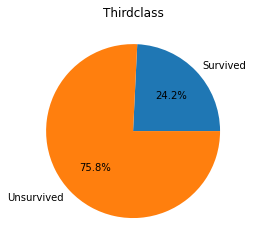

In [5]:
Pclass=train_dataset['Pclass'] #保存性别组成
print(f'协方差：{Pclass.cov(survived)}') #计算协方差
print(f'相关系数：{Pclass.corr(survived)}') #计算相关系数
survived_yes_firstclass=train_dataset[(train_dataset.Pclass==1)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
# print(int(survived_yes_male))
survived_no_firstclass=train_dataset[(train_dataset.Pclass==1)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_secondclass=train_dataset[(train_dataset.Pclass==2)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_secondclass=train_dataset[(train_dataset.Pclass==2)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_thirdclass=train_dataset[(train_dataset.Pclass==3)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_thirdclass=train_dataset[(train_dataset.Pclass==3)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
# 绘图
plt.figure(1)
data1=pd.Series({'Survived':int(survived_yes_firstclass),'Unsurvived':int(survived_no_firstclass)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data1.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data1.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Firstclass', #为饼图添加标题
          )
plt.show()
plt.figure(2)
data2=pd.Series({'Survived':int(survived_yes_secondclass),'Unsurvived':int(survived_no_secondclass)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data2.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data2.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Secondclass', #为饼图添加标题
          )
plt.show()
plt.figure(3)
data3=pd.Series({'Survived':int(survived_yes_thirdclass),'Unsurvived':int(survived_no_thirdclass)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data3.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data3.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Thirdclass', #为饼图添加标题
          )
plt.show()

可以从可视化的分类数据，以及相关系数看出“船票等级”与“幸存”有关系，故此特征保留。
### (6)同船的兄弟姐妹与幸存关系(有3个及3个以上的样本较少，故只取0,1,2即可)

协方差：-0.018953580751333566
相关系数：-0.03532249888573559


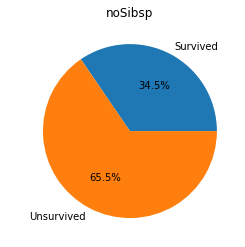

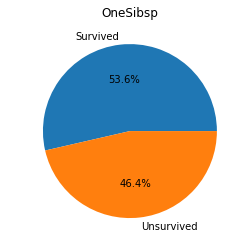

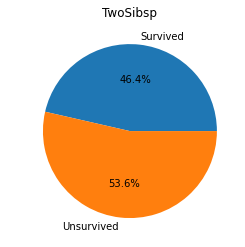

In [6]:
Sibsp=train_dataset['SibSp'] #保存性别组成
print(f'协方差：{Sibsp.cov(survived)}') #计算协方差
print(f'相关系数：{Sibsp.corr(survived)}') #计算相关系数
survived_yes_noSibsp=train_dataset[(train_dataset.SibSp==0)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
# print(int(survived_yes_male))
survived_no_noSibsp=train_dataset[(train_dataset.SibSp==0)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_oneSibsp=train_dataset[(train_dataset.SibSp==1)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_oneSibsp=train_dataset[(train_dataset.SibSp==1)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_twoSibsp=train_dataset[(train_dataset.SibSp==2)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_twoSibsp=train_dataset[(train_dataset.SibSp==2)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
# 绘图
plt.figure(1)
data1=pd.Series({'Survived':int(survived_yes_noSibsp),'Unsurvived':int(survived_no_noSibsp)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data1.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data1.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='noSibsp', #为饼图添加标题
          )
plt.show()
plt.figure(2)
data2=pd.Series({'Survived':int(survived_yes_oneSibsp),'Unsurvived':int(survived_no_oneSibsp)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data2.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data2.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='OneSibsp', #为饼图添加标题
          )
plt.show()
plt.figure(3)
data3=pd.Series({'Survived':int(survived_yes_twoSibsp),'Unsurvived':int(survived_no_twoSibsp)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data3.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data3.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='TwoSibsp', #为饼图添加标题
          )
plt.show()

### (7)同船的父母孩子与幸存关系(有3个及3个以上的样本较少，故只取0,1,2即可)

协方差：0.03201679718533651
相关系数：0.08162940708348349


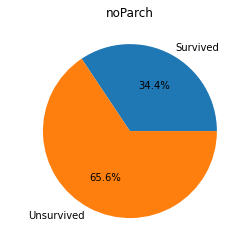

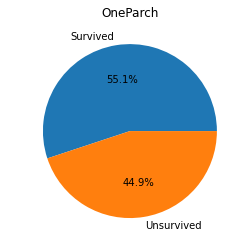

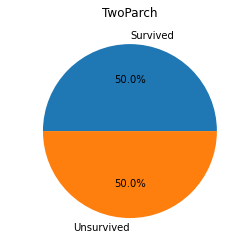

In [7]:
Parch=train_dataset['Parch'] #保存性别组成
print(f'协方差：{Parch.cov(survived)}') #计算协方差
print(f'相关系数：{Parch.corr(survived)}') #计算相关系数
survived_yes_noParch=train_dataset[(train_dataset.Parch==0)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
# print(int(survived_yes_male))
survived_no_noParch=train_dataset[(train_dataset.Parch==0)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_oneParch=train_dataset[(train_dataset.Parch==1)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_oneParch=train_dataset[(train_dataset.Parch==1)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_twoParch=train_dataset[(train_dataset.Parch==2)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_twoParch=train_dataset[(train_dataset.Parch==2)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
# 绘图
plt.figure(1)
data1=pd.Series({'Survived':int(survived_yes_noParch),'Unsurvived':int(survived_no_noParch)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data1.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data1.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='noParch', #为饼图添加标题
          )
plt.show()
plt.figure(2)
data2=pd.Series({'Survived':int(survived_yes_oneParch),'Unsurvived':int(survived_no_oneParch)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data2.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data2.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='OneParch', #为饼图添加标题
          )
plt.show()
plt.figure(3)
data3=pd.Series({'Survived':int(survived_yes_twoParch),'Unsurvived':int(survived_no_twoParch)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data3.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data3.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='TwoParch', #为饼图添加标题
          )
plt.show()

说明：从协方差和相对系数来看，这两组数据对“幸存”好像并不是很相关，可能是因为具有“SibSp”和“Parch”的样本数量太少，比如“TwoSibSP”一组中，Unsurvived的人数比Survived的还多，所以可能造成运用数学公式进行计算上会存在误差。但是，通过饼状图，我们可以发现没有一个人(没有同船的兄弟姐妹和家人的样本)的幸存率确实相比来说较低，所以，为了我们还是保留这两个特征进行分析。
### (8)登船港口与幸存关系(这里我们需要对港口名字进行"编码"，S为0,C为1,Q为2)

协方差：0.03361530822160742
相关系数：0.10866867101787409


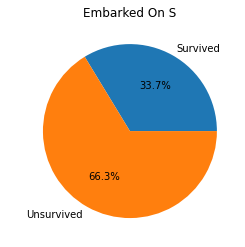

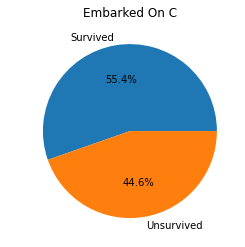

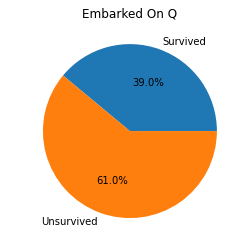

In [8]:
train_dataset.replace('S',int(0),inplace=True) #"编码"港口
train_dataset.replace('C',int(1),inplace=True) #"编码"港口
train_dataset.replace('Q',int(2),inplace=True) #"编码"港口
Embarked=train_dataset['Embarked'] #保存性别组成
print(f'协方差：{Embarked.cov(survived)}') #计算协方差
print(f'相关系数：{Embarked.corr(survived)}') #计算相关系数
survived_yes_EmbarkedS=train_dataset[(train_dataset.Embarked==0)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
# print(int(survived_yes_male))
survived_no_EmbarkedS=train_dataset[(train_dataset.Embarked==0)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_EmbarkedC=train_dataset[(train_dataset.Embarked==1)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_EmbarkedC=train_dataset[(train_dataset.Embarked==1)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_yes_EmbarkedQ=train_dataset[(train_dataset.Embarked==2)&(train_dataset.Survived==1)]['Survived'].value_counts() #筛选两个条件都满足的样本
survived_no_EmbarkedQ=train_dataset[(train_dataset.Embarked==2)&(train_dataset.Survived==0)]['Survived'].value_counts() #筛选两个条件都满足的样本
# 绘图
plt.figure(1)
data1=pd.Series({'Survived':int(survived_yes_EmbarkedS),'Unsurvived':int(survived_no_EmbarkedS)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data1.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data1.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Embarked On S', #为饼图添加标题
          )
plt.show()
plt.figure(2)
data2=pd.Series({'Survived':int(survived_yes_EmbarkedC),'Unsurvived':int(survived_no_EmbarkedC)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data2.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data2.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Embarked On C', #为饼图添加标题
          )
plt.show()
plt.figure(3)
data3=pd.Series({'Survived':int(survived_yes_EmbarkedQ),'Unsurvived':int(survived_no_EmbarkedQ)}) #创建绘图序列组成
plt.axes(aspect='equal') #控制饼图为正圆
data3.name=' ' #将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data3.plot(kind='pie', #饼状
           autopct='%.1f%%', #饼图中添加数值标签
           title='Embarked On Q', #为饼图添加标题
          )
plt.show()

可以从可视化的分类数据，以及相关系数看出“登船口”与“幸存”有关系，故此特征保留。(个人感觉可能是登船口不一样，会有船舱位置或者身份或者票价等原因，造成幸存率不一样，特别是C口上船幸存率较高)

### (9)船票价格与幸存的关系
这里，因为船票价格没有统一的标准，所以我们直接计算“船票价格”与“幸存”的协方差与相关系数。

相关系数：0.2573065223849624


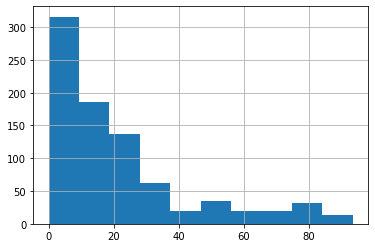

In [9]:
# train_dataset['Fare'].hist()
train_dataset[train_dataset.Fare<=100]['Fare'].hist() #查看船票价格分布
Fare=train_dataset['Fare']
print(f'相关系数：{Fare.corr(survived)}') #计算相关系数

<big>至此，没有缺失数据的特征相关性已经判断完毕了(Embarked只缺2个)，所以接着我们应该对数据进行处理并补充数据了。

### <big>3.预处理和补充缺失数据</big>

### (1)导入第三方库

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

### (2)处理掉不需要的特征

In [11]:
train_dataset=pd.read_csv('data/train.csv') #导入训练数据集
train_dataset.drop(['PassengerId','Name','Ticket'],axis=1,) #处理不需要的特征列

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### (3)补充Age数据
因为Age数据一共缺失了177个，占总样本的数量不大，所以此处我决定找方法将Age进行补全。所以，接着我就去网上查找补充缺失数据的原理和方法，希望能找到一个补充正确率高一点的方法。GO!
* <big>数据缺失简介</big>：数据缺失在许多研究领域都是一个复杂的问题，对机器学习来说，缺失值的存在，造成了以下影响：

    * 系统丢失了大量的有用信息，使训练模型精准度降低；  
    * 系统中所表现出的不确定性更加显著，系统训练效率降低；  
    * 包含空值的数据会使训练过程陷入混乱，导致多次训练得出相差较大的输出。
    
    **特别的，机器学习算法本身需要大量的数据进行训练和预测，所以数据对于机器学习算法而言是非常重要的，因此，缺失值需要通过专门的方法进行推导、填充等，以减少机器学习算法与实际应用之间的差距。**  
    

* <big>数据缺失机制</big>：  
    
    * 完全随机缺失（missing completely at random,MCAR）：指的是数据的缺失是完全随机的，不依赖于任何不完全变量或完全变量，不影响样本的无偏性；  
    * 随机缺失(missing at random,MAR)：指的是数据的缺失不是完全随机的，即该类数据的缺失依赖于其他完全变量；  
    * 非随机缺失(missing not at random,MNAR)：指的是数据的缺失与不完全变量自身的取值有关。  
    

* <big>数据补齐方法</big>：  

    * 人工填写（filling manually）  
        此处不能用该方法实现。
    * 特殊值填充（Treating Missing Attribute values as Special values）  
        将空值作为一种特殊的属性值来处理，它不同于其他的任何属性值，如所有的空值都用“unknown”填充。
    * 平均值填充（Mean/Mode Completer）  
        将初始数据集中的属性分为数值属性和非数值属性来分别进行处理。   
        如果空值是数值型的，就根据该属性在其他所有对象的取值的平均值来填充该缺失的属性值；   
        如果空值是非数值型的，就根据统计学中的众数原理，用该属性在其他所有对象的取值次数最多的值(即出现频率最高的值)来补齐该缺失的属性值。  
    * 条件平均值填充法（Conditional Mean Completer） 
    * 热卡填充（Hot deck imputation，或就近补齐） 
    * K最近距离邻法（K-means clustering）
    * 回归（Regression）
    * 期望值最大化方法（Expectation maximization，EM）
    * C4.5方法    
    
总的来说，在机器学习中处理这一类问题，主要有几种方式进行：
* **使用可用特征的均值来填补缺失值**
* **使用特殊值来填补缺失值**
* **忽略有缺失值的样本**
* **使用相似样本的均值填补缺失值**
* **使用另外的机器学习算法预测缺失值**

所以，这里我决定使用两种方式进行补全，一种是使用**平均值补全**，另一种就是使用**机器学习补全。**

### (3.1)平均值补全


In [12]:
age_average=train_dataset['Age'].mean() #计算年龄平均值
train_dataset['Age']=train_dataset['Age'].fillna(age_average) #将平均值补齐
print(train_dataset['Age'])
print(f'年龄平均值为{age_average}岁')

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64
年龄平均值为29.69911764705882岁


### (3.2)年龄预测模型补全

In [13]:
train_dataset=pd.read_csv('data/train.csv') #导入训练数据集
train_dataset.drop(['PassengerId','Name','Ticket'],axis=1,) #处理不需要的特征列
train_dataset.replace('male',int(0),inplace=True) #"编码性别"
train_dataset.replace('female',int(1),inplace=True) #"编码性别"
age_dataset=train_dataset[['Pclass','Sex','SibSp','Parch','Fare','Age']] #将用于"年龄预测模型"的样本放入
# print(age_dataset)
age_train_dataset=age_dataset[age_dataset['Age'].notnull()] #将有年龄的样本当作训练集
# print(age_train_dataset)
age_predict_dataset=age_dataset[age_dataset['Age'].isnull()] #将没有年龄的样本作为预测集
# print(age_predict_dataset)
age_train_dataset_labels=age_train_dataset['Age'] #将标签拿出来
age_train_dataset=age_train_dataset.drop(['Age'],axis=1) #将标签从训练集扔掉
# print(age_predict_dataset)
age_predict_dataset=age_predict_dataset.drop(['Age'],axis=1) #将标签从预测集扔掉
# 训练
rfc=RandomForestClassifier() #创建模型实例
rfc.fit(age_train_dataset,age_train_dataset_labels.astype('int')) #训练
age_predict_dataset_labels=rfc.predict(age_predict_dataset) #预测
print(f'预测的年龄为{age_predict_dataset_labels}') 
# 填充
train_dataset.loc[train_dataset['Age'].isnull(),'Age']=age_predict_dataset_labels

预测的年龄为[21 30 15 22 19 19 23 22 23 19 30 36 22 24 56 40 40 19 30 22 30 30 19 33
 31 30 32 30 29 22 17  1 22 64  2 16 23 71 24 32 22  1 25 19  8 23 14 24
 22 26 32 22 40 22 38 64 40 32 22 24 30 30 30  1 18 23 19 26 71 22 19 19
 36 13 22 35 19 21  8 19 19 38 15 19 22 32 26 19 25 30 35 32 30 38 21 22
 47 38  8 25 19 19 21 45 30 39 22 23 22 23  4 19 54 20 22 32 30 15 23 22
 14 17 30 27 19 22 19 36 25 24 32 21 38 30 32 42 19 31 19 33 35 38 15 32
 16 40 45 28 16 38 19 19 29 19 36 25 22 32 21 26 32 16 56 38 27 32 32 23
 30 58  1 35 23 16 28 19 10]


这里选择使用了在 **“第一次报告”** 里效果比较好的 **“随机森林”** 进行预测，虽然年龄中出现了较多几岁的值，但是我感觉比用平均值直接填入应该会好很多。所以，在后续的处理中我也将这个当作了样本中的年龄。
### (4)Cabin数据处理
考虑到由于‘Cabin’的数据缺失太多了，所以想补齐基本上是不可能的。另外，考虑到‘Cabin’大概率会和‘Pclass’,‘Fare’有关，所以此处采取删去处理。

In [14]:
train_dataset=train_dataset.drop(['Cabin'],axis=1)

### (5)Embarked数据处理
因为‘Embarked’只缺少了2个数据，我们先看看这两个样本。

In [15]:
Embarked_null_dataset=train_dataset[train_dataset['Embarked'].isnull()] #找到那两个样本
print(Embarked_null_dataset)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61     1  38.0      0      0  113572  80.0      NaN  
829    1  62.0      0      0  113572  80.0      NaN  


通过观察‘62’与‘830’样本，我们可以发现二者的‘Ticket’都是一样的，所以我尝试继续看有没有一样‘Ticket’的乘客，如果有的话就应该和他们是从相同港口登陆的。

In [16]:
Embarked_Ticket_dataset=train_dataset[train_dataset['Ticket']==str(113572)] #找到Ticket为113572的样本
print(Embarked_Ticket_dataset)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61     1  38.0      0      0  113572  80.0      NaN  
829    1  62.0      0      0  113572  80.0      NaN  


但是，好像和我们预料的不太一样，‘Ticket’为113572的只有这两人，所以这里我就索性用众数‘S’来补齐了。

In [17]:
train_dataset['Embarked']=train_dataset['Embarked'].fillna("S")

### (6)舍弃不用特征
到此，我们终于快结束对数据的处理了，只需要drop掉不需要的特征列即可，先查看目前的dataset情况。

发现，其中 <big> **‘PassengerId’,‘Name’,‘Ticket’**</big> 是不需要用到的，所以此处我们进行删除。 

In [18]:
train_dataset=train_dataset.drop(['PassengerId','Name','Ticket'],axis=1) #扔掉
print(train_dataset)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    0  22.0      1      0   7.2500        S
1           1       1    1  38.0      1      0  71.2833        C
2           1       3    1  26.0      0      0   7.9250        S
3           1       1    1  35.0      1      0  53.1000        S
4           0       3    0  35.0      0      0   8.0500        S
..        ...     ...  ...   ...    ...    ...      ...      ...
886         0       2    0  27.0      0      0  13.0000        S
887         1       1    1  19.0      0      0  30.0000        S
888         0       3    1  10.0      1      2  23.4500        S
889         1       1    0  26.0      0      0  30.0000        C
890         0       3    0  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


### (7)编码
现在还差训练前的最后一步，将 **‘Embarked’** 编码。  
因为之前没有接触过对于“文本特征”的处理，所以我也在网上搜寻了有关“机器学习编码”的知识。
* <big>LabelEncoder标签编码</big>  
    利用LabelEncoder() 将转换成连续的数值型变量。即是对不连续的数字或者文本进行编号  
    比如，此处将 **'S'==1,'C'==2,'Q'==3** 这种方式去进行编码。
    

* <big>OneHotEncoder独热编码</big>    &nbsp;  **Reference：[CSDN](https://blog.csdn.net/weixin_40807247/article/details/82812206)**  
    * **简介**：
        &nbsp;  
    假如有三种颜色特征：红、黄、蓝。 在利用机器学习的算法时一般需要进行向量化或者数字化。那么我们可能想令“红=1，黄=2，蓝=3”, 那么这样其实实现了标签编码，即给不同类别以标签。然而这意味着机器可能会学习到“红<黄<蓝”，但这并不是我们的让机器学习的本意，只是想让机器区分它们，并无大小比较之意。所以这时标签编码是不够的，需要进一步转换。即红色：1 0 0 ，黄色: 0 1 0，蓝色：0 0 1 。如此一来每两个向量之间的距离都是根号2，在向量空间距离都相等，所以这样不会出现偏序性，基本不会影响基于向量空间度量算法的效果。
    * **意义**：
        &nbsp;  
    独热编码（哑变量 dummy variable）是因为大部分算法是基于向量空间中的度量来进行计算的，为了使非偏序关系的变量取值不具有偏序性，并且到圆点是等距的。使用one-hot编码，将离散特征的取值扩展到了欧式空间，离散特征的某个取值就对应欧式空间的某个点。将离散型特征使用one-hot编码，会让特征之间的距离计算更加合理。离散特征进行one-hot编码后，编码后的特征，其实每一维度的特征都可以看做是连续的特征。就可以跟对连续型特征的归一化方法一样，对每一维特征进行归一化。比如归一化到[-1,1]或归一化到均值为0,方差为1。  
    将离散特征通过one-hot编码映射到欧式空间，是因为，在回归，分类，聚类等机器学习算法中，特征之间距离的计算或相似度的计算是非常重要的，而我们常用的距离或相似度的计算都是在欧式空间的相似度计算，计算余弦相似性，基于的就是欧式空间。
    
    * **优缺点**：
    &nbsp;
    &nbsp;  
   **优点** ：独热编码解决了分类器不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。它的值只有0和1，不同的类型存储在垂直的空间。  
   **缺点** ：当类别的数量很多时，特征空间会变得非常大。在这种情况下，一般可以用PCA来减少维度。而且one hot encoding+PCA这种组合在实际中也非常有用。
&nbsp;

&nbsp;
   &nbsp;  
所以，此处我打算第一次尝试用用“OneHotEncoder”对一系列特征进行编码。
### (7.1)对Embarked进行编码




In [19]:
Embarked_encode=pd.get_dummies(train_dataset['Embarked'],prefix='Embarked') #进行"独热编码"
print(Embarked_encode)

     Embarked_C  Embarked_Q  Embarked_S
0             0           0           1
1             1           0           0
2             0           0           1
3             0           0           1
4             0           0           1
..          ...         ...         ...
886           0           0           1
887           0           0           1
888           0           0           1
889           1           0           0
890           0           1           0

[891 rows x 3 columns]


In [20]:
train_dataset=pd.concat([train_dataset,Embarked_encode],axis=1) #将新编码融入训练集中
train_dataset=train_dataset.drop(['Embarked'],axis=1) #将老的特征列丢掉

### (7.2)对Pclass进行编码

In [21]:
Pclass_encode=pd.get_dummies(train_dataset['Pclass'],prefix='Pclass') #进行"独热编码"
print(Pclass_encode)
train_dataset=pd.concat([train_dataset,Pclass_encode],axis=1) #将新编码融入训练集中
train_dataset=train_dataset.drop(['Pclass'],axis=1) #将老的特征列丢掉

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[891 rows x 3 columns]


### (8)检查现有的数据集合

In [22]:
print(train_dataset)

     Survived  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0           0    0  22.0      1      0   7.2500           0           0   
1           1    1  38.0      1      0  71.2833           1           0   
2           1    1  26.0      0      0   7.9250           0           0   
3           1    1  35.0      1      0  53.1000           0           0   
4           0    0  35.0      0      0   8.0500           0           0   
..        ...  ...   ...    ...    ...      ...         ...         ...   
886         0    0  27.0      0      0  13.0000           0           0   
887         1    1  19.0      0      0  30.0000           0           0   
888         0    1  10.0      1      2  23.4500           0           0   
889         1    0  26.0      0      0  30.0000           1           0   
890         0    0  32.0      0      0   7.7500           0           1   

     Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0             1         0         0         1  
1  

### (9)处理预测集
好了，终于经过多重的工作，我们处理好了训练集，接着就是最后一个数据处理了，只要按照上述方法把预测集处理好，就可以开始训练模型和预测数据了。
### (9.1)导入第三方库

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

### (9.2)处理掉不需要的特征

In [24]:
test_dataset=pd.read_csv('data/test.csv') #导入训练数据集
test_dataset=test_dataset.drop(['PassengerId','Name','Ticket'],axis=1) #处理不需要的特征列

### (9.3)找出缺失的值

In [25]:
blank1=test_dataset.isna() #找出缺失的数据
# print(blank)
blank1=blank1.sum() #统计每一类的缺失数据
print(blank1)

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64


### (9.4)处理Fare数据(此处应用平均补齐法)
这里我们可以发现，这个样本只缺少Fare值而不缺少Pclass值，所以我们可以根据Pclass值来进行填充。

In [26]:
Fare_null_dataset=test_dataset[test_dataset['Fare'].isnull()] #找到那个样本
print(Fare_null_dataset)

     Pclass   Sex   Age  SibSp  Parch  Fare Cabin Embarked
152       3  male  60.5      0      0   NaN   NaN        S


可以通过上述发现此样本，其“Pclass”为3，所以我们直接找到所有“Pclass==3”的样本，并将他们的“Fare”求平均值，成为这个样本的“Fare”值。

In [27]:
Fare_dataset=test_dataset[test_dataset['Pclass']==3] 
Fare_average=Fare_dataset['Fare'].mean()
test_dataset['Fare']=test_dataset['Fare'].fillna(Fare_average) #将平均值补齐
print(test_dataset['Fare'])
print(f'Fare平均值为{Fare_average}元')

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64
Fare平均值为12.459677880184334元


### (9.5)Cabin数据处理

In [28]:
test_dataset=test_dataset.drop(['Cabin'],axis=1)

### (9.6)补充Age数据

In [29]:
# 预测
test_dataset.replace('male',int(0),inplace=True) #"编码性别"
test_dataset.replace('female',int(1),inplace=True) #"编码性别"
age_dataset=test_dataset[['Pclass','Sex','SibSp','Parch','Fare','Age']] #将用于"年龄预测模型"的样本放入
# print(age_dataset)
age_test_dataset=age_dataset[age_dataset['Age'].notnull()]#将有年龄的样本当作训练集
# print(age_train_dataset)
age_predict_dataset=age_dataset[age_dataset['Age'].isnull()]#将没有年龄的样本作为预测集
age_test_dataset_labels=age_test_dataset['Age'] #将标签拿出来
age_test_dataset=age_test_dataset.drop(['Age'],axis=1) #将标签从训练集扔掉
age_predict_dataset=age_predict_dataset.drop(['Age'],axis=1) #将标签从预测集扔掉
# 训练及预测
rfc=RandomForestClassifier() #创建模型实例
rfc.fit(age_test_dataset,age_test_dataset_labels.astype('int')) #训练
age_predict_dataset_labels=rfc.predict(age_predict_dataset) #预测
print(f'预测的年龄为{age_predict_dataset_labels}')
# 填充
test_dataset.loc[test_dataset['Age'].isnull(),'Age']=age_predict_dataset_labels


预测的年龄为[21 36 21  0 18 14 42 18 40 36 31 32 21 25 18 24 26 32 18 18 27 18 23 21
 18 19 36 21 48 42 21 17 23 55 24 18 18 10 46 18 22 50 23 18 32 36 24 26
 26 13 45 24 18 21 49 24 18 18 30 22 24 24 18 32 47 18 21 41 24 32 22 18
 40 11 26 18 40 18 18 22 26 22 24 32 32  6]


### (9.7)对Embarked进行编码

In [30]:
Embarked_encode=pd.get_dummies(test_dataset['Embarked'],prefix='Embarked') #进行"独热编码"
print(Embarked_encode)
test_dataset=pd.concat([test_dataset,Embarked_encode],axis=1) #将新编码融入训练集中
test_dataset=test_dataset.drop(['Embarked'],axis=1) #将老的特征列丢掉

     Embarked_C  Embarked_Q  Embarked_S
0             0           1           0
1             0           0           1
2             0           1           0
3             0           0           1
4             0           0           1
..          ...         ...         ...
413           0           0           1
414           1           0           0
415           0           0           1
416           0           0           1
417           1           0           0

[418 rows x 3 columns]


### (9.8)对Pclass进行编码

In [31]:
Pclass_encode=pd.get_dummies(test_dataset['Pclass'],prefix='Pclass') #进行"独热编码"
print(Pclass_encode)
test_dataset=pd.concat([test_dataset,Pclass_encode],axis=1) #将新编码融入训练集中
test_dataset=test_dataset.drop(['Pclass'],axis=1) #将老的特征列丢掉

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           0         0         1
2           0         1         0
3           0         0         1
4           0         0         1
..        ...       ...       ...
413         0         0         1
414         1         0         0
415         0         0         1
416         0         0         1
417         0         0         1

[418 rows x 3 columns]


### (9.9)检查现有预测数据集

In [32]:
print(test_dataset)

     Sex   Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  Embarked_S  \
0      0  34.5      0      0    7.8292           0           1           0   
1      1  47.0      1      0    7.0000           0           0           1   
2      0  62.0      0      0    9.6875           0           1           0   
3      0  27.0      0      0    8.6625           0           0           1   
4      1  22.0      1      1   12.2875           0           0           1   
..   ...   ...    ...    ...       ...         ...         ...         ...   
413    0  32.0      0      0    8.0500           0           0           1   
414    1  39.0      0      0  108.9000           1           0           0   
415    0  38.5      0      0    7.2500           0           0           1   
416    0  32.0      0      0    8.0500           0           0           1   
417    0   6.0      1      1   22.3583           1           0           0   

     Pclass_1  Pclass_2  Pclass_3  
0           0         0    

很好，结果看起来很符合我们想要的训练集和预测集，接着我们就能开始预测了！
## 4.训练与预测！
经过了漫长的数据处理部分，现在终于是能够开始应用机器学习算法进行训练和预测了。  
这个部分我打算像 **“报告1”** 一样，用4种算法验证：
* 逻辑回归
* 神经网络之自己写的NN
* 神经网络之MLP
* 随机森林

### (1)逻辑回归
### (1.1)导入第三方库

In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time

### (1.2)生成数据集

In [34]:
train_dataset_labels=train_dataset['Survived'] #提取训练集的标签
train_dataset=train_dataset.drop(['Survived'],axis=1) #将标签从训练集扔掉

### (1.3)训练与预测

In [35]:
# 训练
time_start=time.time()
LR=LogisticRegression(max_iter=5000) #生成逻辑回归实例
LR.fit(train_dataset,train_dataset_labels) #训练
print(f'训练用时{time.time()-time_start}s')

# 预测
train_dataset_predictlabels=LR.predict(train_dataset) #得到训练数据集的预测标签
train_dataset_accuracy=accuracy_score(train_dataset_labels,train_dataset_predictlabels) #得到训练数据集的预测正确率
print(f'使用训练数据集测试LR模型，正确率为{train_dataset_accuracy*100}%')

训练用时0.031599998474121094s
使用训练数据集测试LR模型，正确率为81.14478114478115%


### (2)神经网络之自己写的NN
### (2.1)导入第三方库

In [36]:
import NN
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

### (2.2)训练与预测

In [37]:
# 训练
train_nn_labels=train_dataset_labels.to_numpy() #从Dataframe格式转为ndarray格式
train_nn_dataset=train_dataset.to_numpy() #从Dataframe格式转为ndarray格式
nn=NN.NN(train_nn_dataset,train_nn_labels) #生成实例
nn.change_Parameters(input_num=11,hide_num=10,output_num=2,alpha=0.001,times=1000) #这里是输入36个维度，隐层2个维度，输出2个维度，alpha为试出来感觉比较好的值，计算1000次
time_start=time.time()# 计时
nn.init_wb() #初始化
nn.back_calculate() #反向传播计算
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')
train_dataset_predictlabels=nn.predict_no_orgin_labels(train_nn_dataset) #预测
train_dataset_accuracy=accuracy_score(train_nn_labels,train_dataset_predictlabels) #得到训练数据集的预测正确率
print(f'使用训练数据集测试MLP模型，正确率为{train_dataset_accuracy*100}%')

经过50次训练，模型预计精准度为69.1358024691358%
经过100次训练，模型预计精准度为69.24803591470258%
经过150次训练，模型预计精准度为67.67676767676768%
经过200次训练，模型预计精准度为71.38047138047138%
经过250次训练，模型预计精准度为72.8395061728395%
经过300次训练，模型预计精准度为72.9517396184063%
经过350次训练，模型预计精准度为72.8395061728395%
经过400次训练，模型预计精准度为66.32996632996633%
经过450次训练，模型预计精准度为73.06397306397307%
经过500次训练，模型预计精准度为69.24803591470258%
经过550次训练，模型预计精准度为71.38047138047138%
经过600次训练，模型预计精准度为70.03367003367003%
经过650次训练，模型预计精准度为73.73737373737373%
经过700次训练，模型预计精准度为66.32996632996633%
经过750次训练，模型预计精准度为71.38047138047138%
经过800次训练，模型预计精准度为73.73737373737373%
经过850次训练，模型预计精准度为70.2581369248036%
经过900次训练，模型预计精准度为73.73737373737373%
经过950次训练，模型预计精准度为63.52413019079685%
经过1000次训练，模型预计精准度为76.5432098765432%
训练用时45.24903893470764s
使用训练数据集测试MLP模型，正确率为76.20650953984287%


### (3)神经网络之MLP
### (3.1)导入第三方库

In [38]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

### (3.2)训练与预测

In [39]:
# 训练
mlp=MLPClassifier(max_iter=1000)
mlp_x_train=train_dataset #生成训练数据集样本
mlp_y_train=train_dataset_labels #生成训练数据集标签
time_start=time.time() #计时
mlp.fit(mlp_x_train,mlp_y_train) #训练
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')

# 预测
mlp_x_predict=train_dataset #生成预测数据集样本
mlp_y_predict=train_dataset_labels#生成预测数据集标签
mlp_y_result=mlp.predict(mlp_x_predict) #预测
train_dataset_accuracy=accuracy_score(train_dataset_labels,mlp_y_result) #得到训练数据集的预测正确率
print(f'使用训练数据集测试MLP模型，正确率为{train_dataset_accuracy*100}%')

训练用时0.6410067081451416s
使用训练数据集测试MLP模型，正确率为82.04264870931539%


### (4)随机森林
### (4.1)导入第三方库

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

### (4.2)训练与预测

In [41]:
# 训练
rfc=RandomForestClassifier() #创建模型实例
time_start=time.time() #计时
rfc.fit(train_dataset,train_dataset_labels) #训练
time_end=time.time() #结束计时
print(f'训练用时{time_end-time_start}s')

# 预测
rfc_x_predict=train_dataset #生成预测数据集样本
rfc_y_predict=train_dataset_labels#生成预测数据集标签
rfc_y_result=rfc.predict(rfc_x_predict) #预测
train_dataset_accuracy=accuracy_score(train_dataset_labels,rfc_y_result) #得到训练数据集的预测正确率
print(f'使用训练数据集测试RandomForest模型，正确率为{train_dataset_accuracy*100}%')

训练用时0.10480189323425293s
使用训练数据集测试RandomForest模型，正确率为97.41863075196409%


<big>第一时间看到这个结果的时候，我真的还挺惊讶的，**随机森林** 的预测率竟然这么高！不愧是在“报告1”中展现出了能力的算法，这次得到的结果竟然有如此高的准确率，而且训练用时也才0.1s(以后要多用用这种算法哈哈哈)。所以，我打算就采用**随机森林**来对预测集进行预测。

### (5)生成对预测集的预测结果

In [42]:
rfc_x_predict=test_dataset #生成预测数据集样本
rfc_y_result=rfc.predict(rfc_x_predict) #预测

### (6)保存预测数据

In [43]:
predict_dataset_predictlabels=rfc_y_result#预测测试数据集样本
PassengerId=pd.DataFrame(np.array(np.arange(418)+892),columns=['PassengerId']) #生成id数组，并且生成文件类型的列
predictlabels=pd.DataFrame(predict_dataset_predictlabels,columns=['Survived']) #将预测的标签生成文件类型的列
submit_data=pd.concat([PassengerId,predictlabels],axis=1) #将id与预测标签合并
submit_data.to_csv("submit_data/submit_data",index=False) #生成的文件保存

## 总结
本次的任务是通过学习已知的幸存者和未幸存者的信息，来推断其他乘客是否幸存。  
这次，我使用了和第一次一样的四种训练模型，我们可以对结果进行比对：  

|模型|训练用时|预测正确率|最优模型|
|:-:|:-:|:-:|:-:|
|逻辑回归|0.03s|81%||
|自己写的NN|45s|76%||
|MLP|0.6s|82%||
|随机森林|0.1s|97%|🙌|

可以发现随机森林的正确率还是一如既往的厉害，在报告1中体现出的优势，在这次的问题上也展现出了其强大的一面。  
(Plus:自己写的NN还是一如既往的劣质哈哈哈)


## 个人体会
&nbsp;&nbsp;&nbsp;&nbsp; 本次的报告前前后后加起来也是用了整整一天多的时间，完成报告用时最长部分就是在继续学习Pandas的函数 **(对于Pandas的Series与DataFrame两种数据类型的操作更加熟练了，也对利用Pandas画图更加熟悉了)**；**其次就是在学习怎么处理没有完全数据集的机器学习(分为补齐和填充，其中填充又分为了 “平均值填充”和“通过构建预测模型进行填充”）**；还学习到了如何在机器学习领域对“文本信息”进行数字编码 **（分为“标签编码”与“独热编码”，当然各有各的优势）**。反而，真正进行积极学习的部分，我利用到了很多解决**报告1**问题的方法和经验，这一部分没有花太多的时间。  
&nbsp;&nbsp;&nbsp;&nbsp; 这次的报告也让我体会到了在机器学习领域中**数据的重要性**，不仅是因为这次报告花了很长的时间去解决数据集缺失数据的问题，更是在于如何合理处理这些数据来使模型有更好的预测准确率。甚至，在补充缺失数据的时候，还用到了机器学习的算法。  
&nbsp;&nbsp;&nbsp;&nbsp; 但是这也让我想起了本次报告还存在的一些问题，比如该如何处理 **“Cabin”** 这个参数。首先，因为缺失样本太多所以补齐是不太可取的，但是我看网上有说或许把这类变量当作“Unknown”来进行学习可能效果更好，所以如何处理这一点可以值得后续去探索。  
&nbsp;&nbsp;&nbsp;&nbsp; 另外，我还在本次的报告中体会到了Jupyter notebook真是进行Debug的好帮手。  
&nbsp;&nbsp;&nbsp;&nbsp; 当写到这里的时候，回头再看第一个报告，好像真的是算非常简单了。或许这就是一点一滴的积累所产生的效果吧，继续好好保持这种学习的劲头，学到更多的东西！虽然现在看起来有很多新东西很难，但是只要自己学过了用过了理解了，这些新东西就变成了很顺手的工具一般，所以，通过反复的训练，只要花时间去学习去练习，自己完成各种任务的效率和能力，也就会自然而然变得更高更强！